<a href="https://colab.research.google.com/github/ameklora/CatsAndDogs/blob/main/catsanddogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as mplt

In [3]:
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/"
"download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip") #link
dts, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

In [5]:
SIZE = 224
def resize(img, label): #resizing pictures
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (SIZE, SIZE))
  img /= 255.0
  return img, label

In [6]:
train_resized = dts[0].map(resize)
train_batches = train_resized.shuffle(1000).batch(16)
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

In [7]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_batches, epochs=1)

1454/1454 [==============================] - 72s 44ms/step - loss: 0.0635 - accuracy: 0.9769


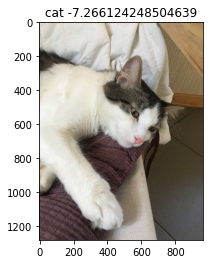

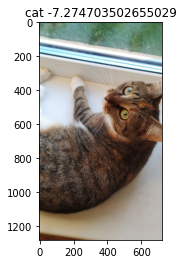

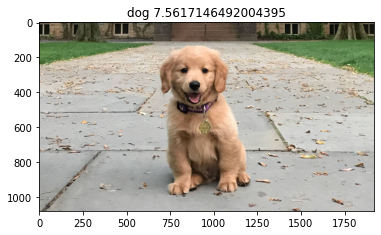

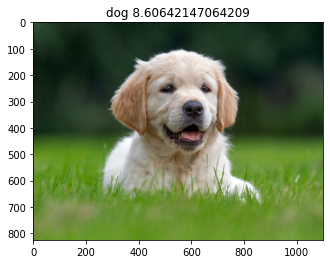

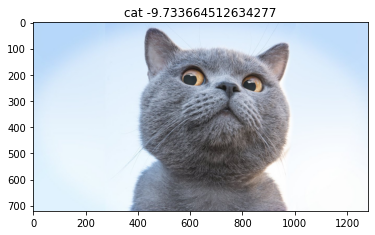

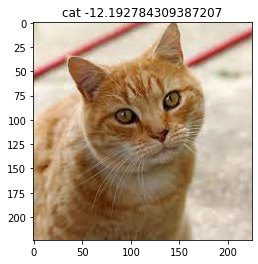

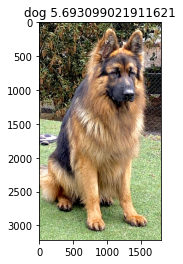

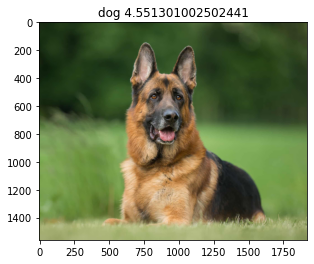

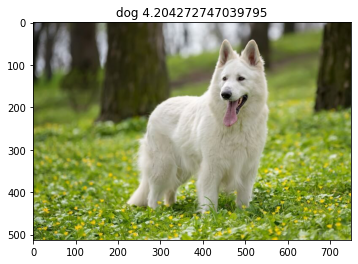

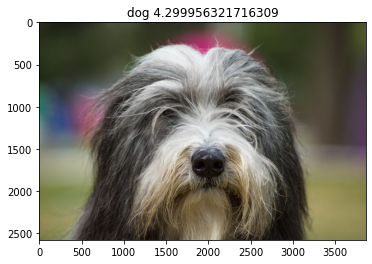

In [9]:
for i in range(1, 11): #number of your pictures +1
  img = load_img(f'{i}.jpg')
  img_array = img_to_array(img)
  img_resized, _ = resize(img_array, _)
  img_expended = numpy.expand_dims(img_resized, axis=0)
  prediction = model.predict(img_expended)[0][0]
  pred_label = 'cat' if prediction < 0.5 else 'dog'
  mplt.figure()
  mplt.imshow(img)
  mplt.title(f'{pred_label} {prediction}')